## Summary of ALL Plots for readme.md

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

In [12]:
# Define a unified strategy mapping
strategy_map = {
    'busy_A': {'label': 'Stubborn Neurons', 'color': 'C0', 'marker': 'o', 'linestyle': '--'},
    'free_A': {'label': 'Plastic Neurons', 'color': 'C1', 'marker': 's', 'linestyle': '-'},
    'busy_H_spec': {'label': 'Specific Neurons (General)', 'color': 'C2', 'marker': '^', 'linestyle': '-.'},
    'spec_B': {'label': 'Specific Neurons', 'color': 'C3', 'marker': 'D', 'linestyle': '-'},
    'busy_B': {'label': 'Candidate Neurons', 'color': 'C4', 'marker': 'P', 'linestyle': '-'},
    'rnd': {'label': 'Random Neurons', 'color': 'C5', 'marker': '*', 'linestyle': ':'},
    'busy_H': {'label': 'Lottery Ticket Neurons', 'color': 'C6', 'marker': 'v', 'linestyle': '--'},
    'free_H': {'label': 'Non-Lottery Neurons', 'color': 'C7', 'marker': 'X', 'linestyle': '-.'}
}

def plot_pareto_combined(diss_filepath, nondiss_filepath, diss_filename, nondiss_filename, 
                        experiment_name, diss_strategy_selections, nondiss_strategy_selections, output_filename, 
                        figsize=(12, 6), lora=False, marker_size=160, x_lim=[0.5, 1.02], y_lim=[0.5, 1.02], outside = True, legend= True):
    """Combined Pareto plot for dissonant and non-dissonant cases."""
    output_dir = f"./figures/{experiment_name}"
    os.makedirs(output_dir, exist_ok=True)

    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({
        'font.size': 24,
        'axes.titlesize': 22,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'legend.fontsize': 24,
        'font.family': 'serif',
        'text.usetex': True,
        'figure.figsize': figsize
    })

    # Load both datasets
    with open(os.path.join(diss_filepath, diss_filename), 'r') as file:
        diss_data = json.load(file)
    with open(os.path.join(nondiss_filepath, nondiss_filename), 'r') as file:
        nondiss_data = json.load(file)

    # Process dissonant data
    diss_results = {}
    diss_ftb_accA = diss_ftb_accB = 0
    diss_LoRAftb_accA = diss_LoRAftb_accB = 0
    n_diss_folds = len(diss_data['results'].keys())

    for fold in diss_data['results'].values():
        diss_ftb_accA += fold['ft-notb']['avg_accA']
        diss_ftb_accB += fold['ft-notb']['avg_accB']
        if lora:
            diss_LoRAftb_accA += fold['LoRA-ft-notb']['avg_accA']
            diss_LoRAftb_accB += fold['LoRA-ft-notb']['avg_accB']

        for strategy, neurons, _ in diss_strategy_selections:
            if strategy not in diss_results:
                diss_results[strategy] = {'acc_A': [], 'acc_B': []}
            diss_results[strategy]['acc_A'].append(fold['cft-notb'][str(neurons)][strategy]['avg_accA'])
            diss_results[strategy]['acc_B'].append(fold['cft-notb'][str(neurons)][strategy]['avg_accB'])

    # Process non-dissonant data
    nondiss_results = {}
    nondiss_ftb_accA = nondiss_ftb_accB = 0
    nondiss_LoRAftb_accA = nondiss_LoRAftb_accB = 0
    n_nondiss_folds = len(nondiss_data['results'].keys())

    for fold in nondiss_data['results'].values():
        nondiss_ftb_accA += fold['ftb']['avg_accA']
        nondiss_ftb_accB += fold['ftb']['avg_accB']
        if lora:
            nondiss_LoRAftb_accA += fold['LoRA-ftb']['avg_accA']
            nondiss_LoRAftb_accB += fold['LoRA-ftb']['avg_accB']

        for strategy, neurons, _ in nondiss_strategy_selections:
            if strategy not in nondiss_results:
                nondiss_results[strategy] = {'acc_A': [], 'acc_B': []}
            nondiss_results[strategy]['acc_A'].append(fold['cftb'][str(neurons)][strategy]['avg_accA'])
            nondiss_results[strategy]['acc_B'].append(fold['cftb'][str(neurons)][strategy]['avg_accB'])

    # Calculate means
    ftb_stats = {
        'diss': {'accA': diss_ftb_accA / n_diss_folds, 'accB': diss_ftb_accB / n_diss_folds},
        'nondiss': {'accA': nondiss_ftb_accA / n_nondiss_folds, 'accB': nondiss_ftb_accB / n_nondiss_folds}
    }
    
    if lora:
        lora_stats = {
            'diss': {'accA': diss_LoRAftb_accA / n_diss_folds, 'accB': diss_LoRAftb_accB / n_diss_folds},
            'nondiss': {'accA': nondiss_LoRAftb_accA / n_nondiss_folds, 'accB': nondiss_LoRAftb_accB / n_nondiss_folds}
        }

    for strategy in diss_results:
        diss_results[strategy]['mean_acc_A'] = np.mean(diss_results[strategy]['acc_A'])
        diss_results[strategy]['mean_acc_B'] = np.mean(diss_results[strategy]['acc_B'])
    
    for strategy in nondiss_results:
        nondiss_results[strategy]['mean_acc_A'] = np.mean(nondiss_results[strategy]['acc_A'])
        nondiss_results[strategy]['mean_acc_B'] = np.mean(nondiss_results[strategy]['acc_B'])

    # Create figure with two legends
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot baselines
    ax.scatter(ftb_stats['diss']['accA'], ftb_stats['diss']['accB'], 
                color='#ff0000', s=marker_size, alpha=0.7, marker='*')
    ax.scatter(ftb_stats['nondiss']['accA'], ftb_stats['nondiss']['accB'], 
                color='#89a46c', s=marker_size, alpha=0.7, marker='*')
    
    if lora:
        ax.scatter(lora_stats['diss']['accA'], lora_stats['diss']['accB'], 
                    color='#ff0000', s=marker_size, alpha=0.7, marker='P')
        ax.scatter(lora_stats['nondiss']['accA'], lora_stats['nondiss']['accB'], 
                    color='#89a46c', s=marker_size, alpha=0.7, marker='P')

    # Plot strategies with consistent markers
    strategy_scatters = {}
    
    # Process dissonant strategies
    for strategy, neurons, display_name in diss_strategy_selections:
        ax.scatter(diss_results[strategy]['mean_acc_A'], 
                  diss_results[strategy]['mean_acc_B'],
                  color='#ff0000',
                  marker=strategy_map[strategy]['marker'],
                  s=marker_size, alpha=0.7)
        strategy_scatters[display_name] = ax.scatter([], [], 
            color='black', marker=strategy_map[strategy]['marker'], s=marker_size)
            
    # Process non-dissonant strategies
    for strategy, neurons, display_name in nondiss_strategy_selections:
        ax.scatter(nondiss_results[strategy]['mean_acc_A'], 
                  nondiss_results[strategy]['mean_acc_B'],
                  color='#89a46c',
                  marker=strategy_map[strategy]['marker'],
                  s=marker_size, alpha=0.7)
        if display_name not in strategy_scatters:  # Avoid duplicates in legend
            strategy_scatters[display_name] = ax.scatter([], [], 
                color='black', marker=strategy_map[strategy]['marker'], s=marker_size)
    if outside:
        if lora:
            # Create strategy legend
            strategy_legend = ax.legend(
                [strategy_scatters[name] for name in strategy_scatters.keys()] + 
                [ax.scatter([], [], color='black', marker='*', s=marker_size),
                ax.scatter([], [], color='black', marker='P', s=marker_size)],
                list(strategy_scatters.keys()) + ['Full Finetuning', 'LoRA'],
                bbox_transform=ax.transAxes,
                frameon=True,
                framealpha=1,
                facecolor='white',
                bbox_to_anchor=(1.05, 1), loc='upper left'
            )
        else:
            # Create strategy legend
            strategy_legend = ax.legend(
                [strategy_scatters[name] for name in strategy_scatters.keys()] + 
                [ax.scatter([], [], color='black', marker='*', s=marker_size),
                ax.scatter([], [], color='black', marker='P', s=marker_size)],
                list(strategy_scatters.keys()) + ['Full Finetuning'],
                bbox_transform=ax.transAxes,
                frameon=True,
                framealpha=1,
                facecolor='white',
                bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        if lora:
            # Create strategy legend
            strategy_legend = ax.legend(
                [strategy_scatters[name] for name in strategy_scatters.keys()] + 
                [ax.scatter([], [], color='black', marker='*', s=marker_size),
                ax.scatter([], [], color='black', marker='P', s=marker_size)],
                list(strategy_scatters.keys()) + ['Full Finetuning', 'LoRA'],
                bbox_transform=ax.transAxes,
                frameon=True,
                framealpha=1,
                facecolor='white',
                bbox_to_anchor=(1, 0.), loc='lower right'
            )
        else:
            # Create strategy legend
            strategy_legend = ax.legend(
                [strategy_scatters[name] for name in strategy_scatters.keys()] + 
                [ax.scatter([], [], color='black', marker='*', s=marker_size),
                ax.scatter([], [], color='black', marker='P', s=marker_size)],
                list(strategy_scatters.keys()) + ['Full Finetuning'],
                bbox_transform=ax.transAxes,
                frameon=True,
                framealpha=1,
                facecolor='white',
                bbox_to_anchor=(1, 0.), loc='lower right')

    if legend:
        # Add the strategy legend
        ax.add_artist(strategy_legend)

    color_legend = ax.legend(
        [ax.scatter([], [], color='#ff0000', marker='s', s=marker_size, alpha=0),
        ax.scatter([], [], color='#89a46c', marker='s', s=marker_size, alpha=0)],
        [r'$\bf{Dissonant}$', r'$\bf{Non\-dissonant}$'],
        bbox_to_anchor=(0.1, 1), loc='lower left',
        ncol=2,
        columnspacing=4,
        labelcolor=['#ff0000', '#89a46c'],
        handlelength=0
    )

    ax.set_xlabel('Old Knowledge Retention')
    ax.set_ylabel('New Knowledge Acquisition')
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_xlim(x_lim) 
    ax.set_ylim(y_lim) 
    plt.tight_layout()

    # Save plot
    output_path = os.path.join(output_dir, output_filename)
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()
    plt.close()

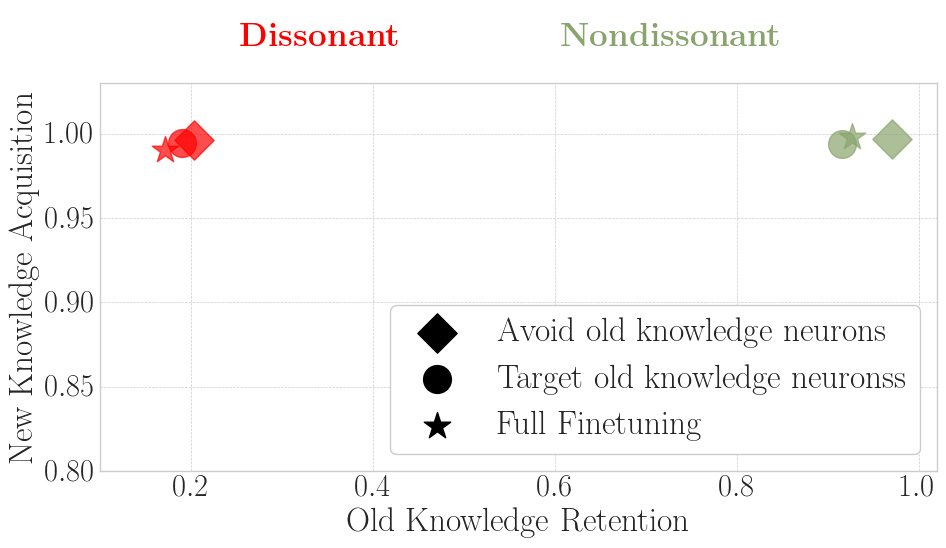

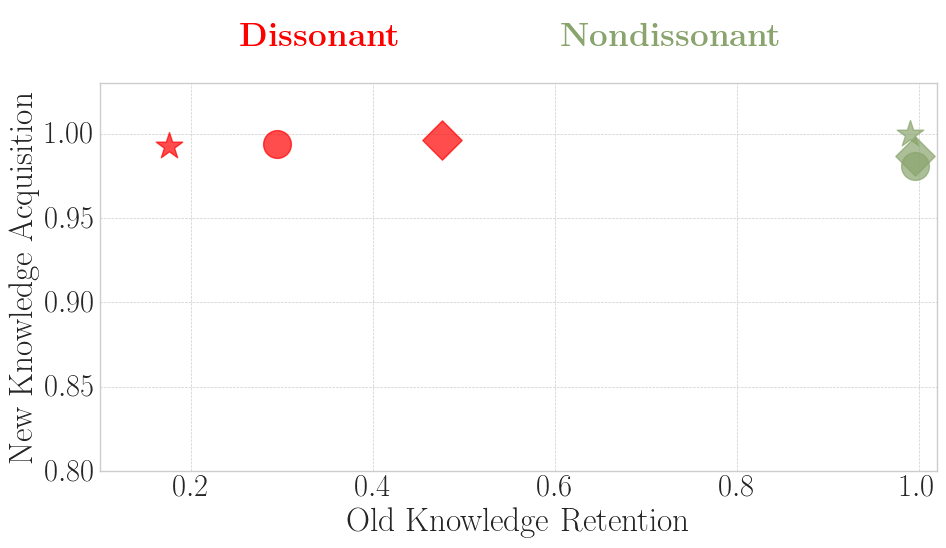

In [13]:
# do gpt2small 
plot_pareto_combined(
    diss_filepath='../results/experiment_3_1/',
    nondiss_filepath='../results/experiment_2_1',
    diss_filename='experiment_3_1_paper_version_LoRA_submitted_conf.json',
    nondiss_filename='experiment_2_1_paper_version_LoRA.json',
    experiment_name='combined_comparison',
    diss_strategy_selections=[
        ('spec_B', 14000, 'Avoid old knowledge neurons'),
        ('busy_A', 14000, 'Target old knowledge neuronss'),
    ],
    nondiss_strategy_selections=[
        ('spec_B', 14000, 'Avoid old knowledge neurons'),
        ('busy_A', 14000, 'Target old knowledge neuronss'),
    ],
    output_filename='combined_comparison_in_gpt2small.pdf',
    figsize=(10, 6),
    lora=False,
    marker_size=400, x_lim=[0.1, 1.02], y_lim=[0.8, 1.03],
    outside=False,
    legend = True
)

plot_pareto_combined(
    diss_filepath='../experiments/gpt2-xl/experiment_3_1/',
    nondiss_filepath='../experiments/gpt2-xl/experiment_2_1/results/',
    diss_filename='experiment_3_1_20240719_085748_20000_1000_10_small_lr.json',
    nondiss_filename='experiment_2_1_20240912_150705epochs50s.json',
    experiment_name='combined_comparison',
    diss_strategy_selections=[
        ('spec_B', 140000, 'Avoid old knowledge neurons'),
        ('busy_A', 140000, 'Target old knowledge neuronss'),
    ],
    nondiss_strategy_selections=[
        ('spec_B', 14000, 'Avoid old knowledge neurons'),
        ('busy_A', 14000, 'Target old knowledge neuronss'),
    ],
    output_filename='combined_comparison_out_gpt2xl.pdf',
    figsize=(10, 6),
    lora=False,
    marker_size=400, x_lim=[0.1, 1.02], y_lim=[0.8, 1.03],
     outside=False,
     legend = False
)

## GPT2small Non dissonant 14k

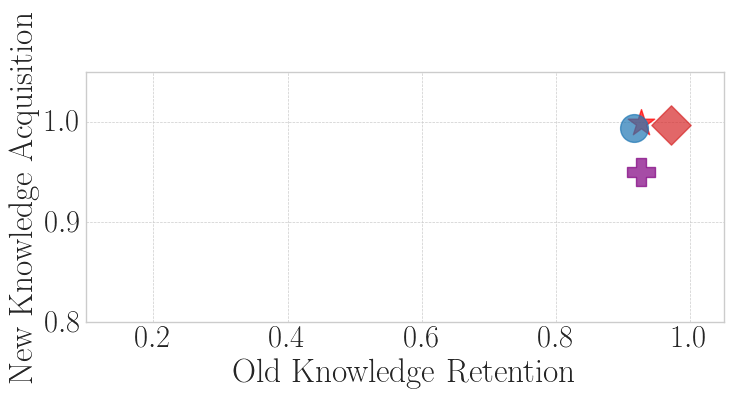

## GPT2XL Non dissonant 14k too

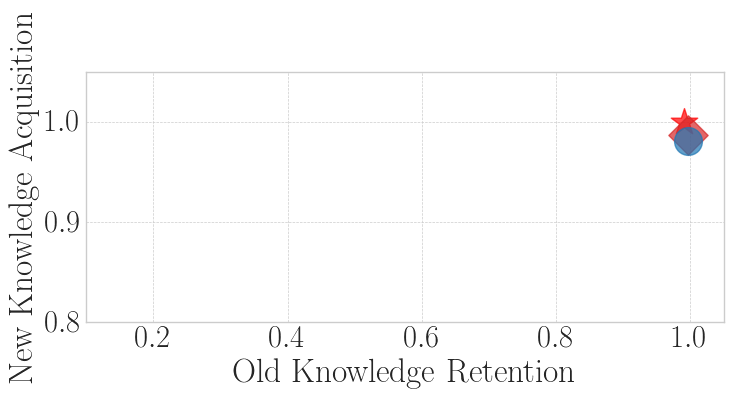

## Zoom on GPT2XL Non dissonant 14k too

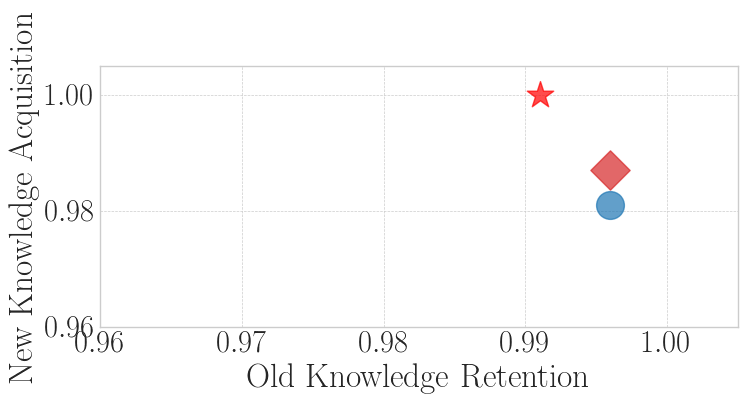

## GPT2XL Non-Dissonant 140k

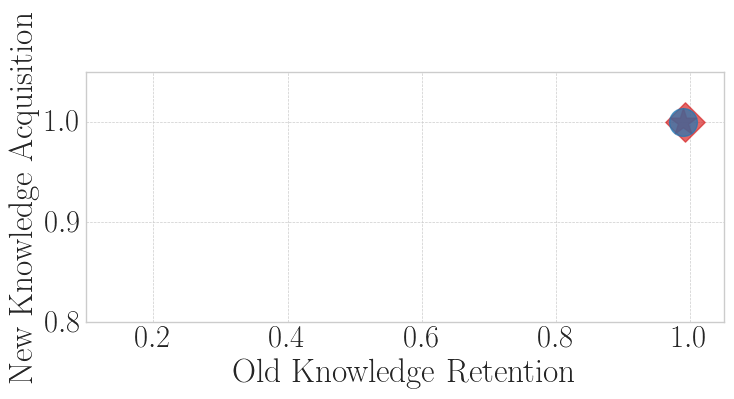

## Zoom on GPT2XL Non-Dissonant 140k

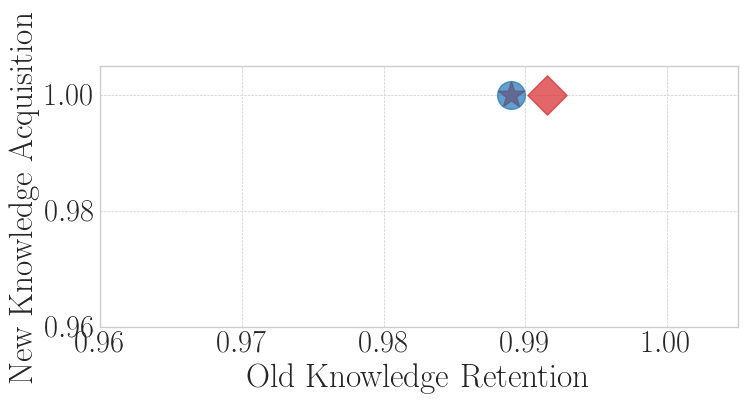

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from IPython.display import display, Markdown


experiment_name = 'readme_front'

def plot_pareto_single_diss(filepath, filename, experiment_name, strategy_selections, output_filename, figsize=(12, 6),lora=False, marker_size=160, x_lim=[0.1, 1.02],y_lim=[0.8, 1.02],legend=False):
    """
    Plot a single Pareto frontier with selected (strategy, neurons) pairs and finetuning baselines.
    
    Args:
        filepath (str): Path to data directory
        filename (str): JSON results filename
        experiment_name (str): Name for output directory
        strategy_selections (list): List of tuples [(strategy, neurons, display_name), ...]
        output_filename (str): Name for output file
        figsize (tuple): Figure dimensions
    """
    # Create output directory
    output_dir = f"./figures/{experiment_name}"
    os.makedirs(output_dir, exist_ok=True)

    # Set matplotlib style
    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({
        'font.size': 24,
        'axes.titlesize': 22,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'legend.fontsize': 24,
        'font.family': 'serif',
        'text.usetex': True,
        'figure.figsize': figsize
    })

    # Load data
    with open(os.path.join(filepath, filename), 'r') as file:
        data = json.load(file)

    # Initialize results
    n_folds = len(data['results'].keys())
    results = {}
    
    # Baseline metrics
    ftb_accA = 0
    ftb_accB = 0
    LoRAftb_accA = 0
    LoRAftb_accB = 0

    # Aggregate results across folds
    for fold in data['results'].values():
        # Baselines
        ftb_accA += fold['ft-notb']['avg_accA']
        ftb_accB += fold['ft-notb']['avg_accB']
        if lora:
            LoRAftb_accA += fold['LoRA-ft-notb']['avg_accA']
            LoRAftb_accB += fold['LoRA-ft-notb']['avg_accB']

        # Selected strategies
        for strategy, neurons, _ in strategy_selections:
            if strategy not in results:
                results[strategy] = {'acc_A': [], 'acc_B': []}
            
            results[strategy]['acc_A'].append(fold['cft-notb'][str(neurons)][strategy]['avg_accA'])
            results[strategy]['acc_B'].append(fold['cft-notb'][str(neurons)][strategy]['avg_accB'])

    # Calculate means
    ftb_accA /= n_folds
    ftb_accB /= n_folds
    if lora:
        LoRAftb_accA /= n_folds
        LoRAftb_accB /= n_folds

    for strategy in results:
        results[strategy]['mean_acc_A'] = np.mean(results[strategy]['acc_A'])
        results[strategy]['mean_acc_B'] = np.mean(results[strategy]['acc_B'])

    # Plotting
    plt.figure(figsize=figsize)
    
    # Plot baselines
    plt.scatter(ftb_accA, ftb_accB, label='Full Finetuning', 
                color='red', s=marker_size, alpha=0.7, marker='*')
    if lora:
        plt.scatter(LoRAftb_accA, LoRAftb_accB, label='LoRA', 
                    color='purple', s=marker_size, alpha=0.7, marker='P')

    # Plot selected strategies
    for strategy, neurons, display_name in strategy_selections:
        plt.scatter(results[strategy]['mean_acc_A'], 
                   results[strategy]['mean_acc_B'],
                   label=display_name,
                   color=strategy_map[strategy]['color'],
                   marker=strategy_map[strategy]['marker'],
                   s=marker_size, alpha=0.7)

    plt.xlabel('Old Knowledge Retention')
    plt.ylabel('New Knowledge Acquisition')
    plt.grid(True, linestyle='--', linewidth=0.5)
    if legend:
        plt.legend(frameon=True, framealpha=1, facecolor='white',  bbox_to_anchor=(1., 0.02), loc='lower right',fontsize=20)
    plt.xlim(x_lim) 
    plt.ylim(y_lim) 
    plt.tight_layout()

    # Save plot
    output_path = os.path.join(output_dir, output_filename)
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()


def plot_pareto_single(filepath, filename, experiment_name, strategy_selections, output_filename, figsize=(12, 6),lora=False, marker_size=160, x_lim=[0.1, 1.02],y_lim=[0.8, 1.02],legend=False):
    """
    Plot a single Pareto frontier with selected (strategy, neurons) pairs and finetuning baselines.
    
    Args:
        filepath (str): Path to data directory
        filename (str): JSON results filename
        experiment_name (str): Name for output directory
        strategy_selections (list): List of tuples [(strategy, neurons, display_name), ...]
        output_filename (str): Name for output file
        figsize (tuple): Figure dimensions
    """
    # Create output directory
    output_dir = f"./figures/{experiment_name}"
    os.makedirs(output_dir, exist_ok=True)

    # Set matplotlib style
    plt.style.use('seaborn-whitegrid')
    plt.rcParams.update({
        'font.size': 24,
        'axes.titlesize': 22,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'legend.fontsize': 24,
        'font.family': 'serif',
        'text.usetex': True,
        'figure.figsize': figsize
    })

    # Load data
    with open(os.path.join(filepath, filename), 'r') as file:
        data = json.load(file)

    # Initialize results
    n_folds = len(data['results'].keys())
    results = {}
    
    # Baseline metrics
    fta_accA = 0
    ftb_accA = 0
    ftb_accB = 0
    LoRAftb_accA = 0
    LoRAftb_accB = 0

    # Aggregate results across folds
    for fold in data['results'].values():
        # Baselines
        fta_accA += fold['fta']['acc_A']
        ftb_accA += fold['ftb']['avg_accA']
        ftb_accB += fold['ftb']['avg_accB']
        if lora:
            LoRAftb_accA += fold['LoRA-ftb']['avg_accA']
            LoRAftb_accB += fold['LoRA-ftb']['avg_accB']

        # Selected strategies
        for strategy, neurons, _ in strategy_selections:
            if strategy not in results:
                results[strategy] = {'acc_A': [], 'acc_B': []}
            
            results[strategy]['acc_A'].append(fold['cftb'][str(neurons)][strategy]['avg_accA'])
            results[strategy]['acc_B'].append(fold['cftb'][str(neurons)][strategy]['avg_accB'])

    # Calculate means
    fta_accA /= n_folds
    ftb_accA /= n_folds
    ftb_accB /= n_folds
    if lora:
        LoRAftb_accA /= n_folds
        LoRAftb_accB /= n_folds

    for strategy in results:
        results[strategy]['mean_acc_A'] = np.mean(results[strategy]['acc_A'])
        results[strategy]['mean_acc_B'] = np.mean(results[strategy]['acc_B'])

    # Plotting
    plt.figure(figsize=figsize)
    
    # Plot baselines
    plt.scatter(ftb_accA, ftb_accB, label='Full Finetuning', 
                color='red', s=marker_size, alpha=0.7, marker='*')
    if lora:
        plt.scatter(LoRAftb_accA, LoRAftb_accB, label='LoRA', 
                    color='purple', s=marker_size, alpha=0.7, marker='P')

    # Plot selected strategies
    for strategy, neurons, display_name in strategy_selections:
        plt.scatter(results[strategy]['mean_acc_A'], 
                   results[strategy]['mean_acc_B'],
                   label=display_name,
                   color=strategy_map[strategy]['color'],
                   marker=strategy_map[strategy]['marker'],
                   s=marker_size, alpha=0.7)

    plt.xlabel('Old Knowledge Retention')
    plt.ylabel('New Knowledge Acquisition')
    plt.grid(True, linestyle='--', linewidth=0.5)
    if legend:
        plt.legend(frameon=True, framealpha=1, facecolor='white', edgecolor='black',  bbox_to_anchor=(1., 0.02), loc='lower right',fontsize=18)
    plt.xlim(x_lim) 
    plt.ylim(y_lim) 
    plt.tight_layout()

    # Save plot
    output_path = os.path.join(output_dir, output_filename)
    plt.savefig(output_path, bbox_inches='tight')
    plt.show()


filepath = '../results/experiment_2_1'
filename = 'experiment_2_1_paper_version_LoRA.json'

# Example usage:
strategy_selections = [
    ('spec_B', 14000, 'Avoid old knowledge neurons'),
    ('busy_A', 14000, 'Target old knowledge neuronss'),
]
display(Markdown("## GPT2small Non dissonant 14k"))
plot_pareto_single(filepath, filename, experiment_name, strategy_selections, 'gpt2-small-non-dissonant.pdf', figsize=(8, 4), lora=True, marker_size=400,x_lim=[0.1, 1.05],y_lim=[0.8, 1.05],legend=False)

# No lora here
filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
filename = 'experiment_2_1_20240912_150705epochs50s.json' 
display(Markdown("## GPT2XL Non dissonant 14k too"))
plot_pareto_single(filepath, filename, experiment_name, strategy_selections, 'gpt2-xl-non-dissonant.pdf', figsize=(8, 4), lora=False, marker_size=400 ,x_lim=[0.1, 1.05],y_lim=[0.8, 1.05],legend=False)
display(Markdown("## Zoom on GPT2XL Non dissonant 14k too"))
plot_pareto_single(filepath, filename, experiment_name, strategy_selections, 'gpt2-xl-non-dissonant_zoom.pdf', figsize=(8, 4), lora=False, marker_size=400,x_lim=[0.96, 1.005],y_lim=[0.96, 1.005],legend=False)


filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
filename = 'experiment_2_1_20240911_181551_bestLR_10XNeurons.json'
strategy_selections = [
    ('spec_B', 140000, 'Avoid old knowledge neurons'),
    ('busy_A', 140000, 'Target old knowledge neurons'),
]
display(Markdown("## GPT2XL Non-Dissonant 140k"))
plot_pareto_single(filepath, filename, experiment_name, strategy_selections, 'gpt2-xl-non-dissonant-10X-neurons.pdf', figsize=(8, 4), lora=False, marker_size=400, x_lim=[0.1, 1.05],y_lim=[0.8, 1.05],legend=False)
display(Markdown("## Zoom on GPT2XL Non-Dissonant 140k"))
plot_pareto_single(filepath, filename, experiment_name, strategy_selections, 'gpt2-xl-non-dissonant-10X-neurons_zoom.pdf', figsize=(8, 4), lora=False, marker_size=400,x_lim=[0.96, 1.005],y_lim=[0.96, 1.005],legend=False)

## GPT2small Dissonant 14k

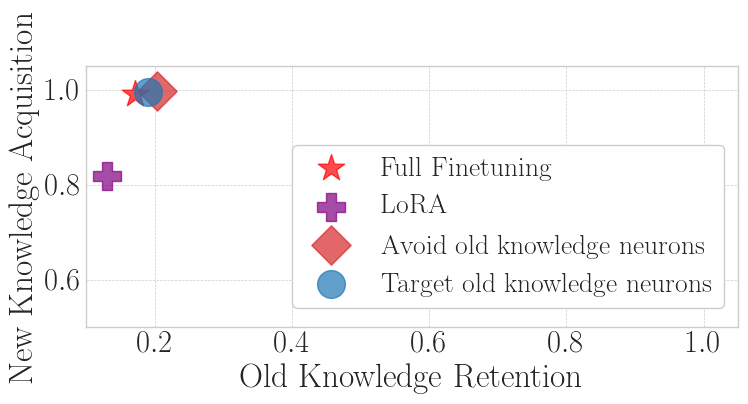

## GPT2XL Dissonant 140k

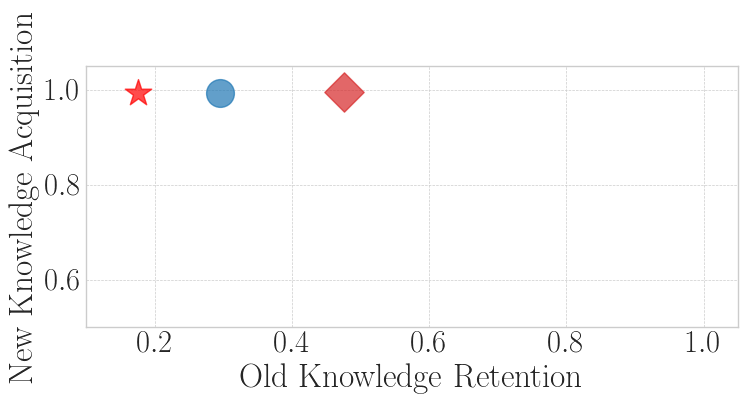

In [42]:
filepath = '../results/experiment_3_1/'
filename = 'experiment_3_1_paper_version_LoRA_submitted_conf.json'
strategy_selections = [
    ('spec_B', 14000, 'Avoid old knowledge neurons'),
    ('busy_A', 14000, 'Target old knowledge neurons'),
]
display(Markdown("## GPT2small Dissonant 14k"))
plot_pareto_single_diss(filepath, filename, experiment_name, strategy_selections, 'gpt2-small-dissonant.pdf', figsize=(8, 4), lora=True, marker_size=400,x_lim=[0.1, 1.05],y_lim=[0.5, 1.05],legend=True)


display(Markdown("## GPT2XL Dissonant 140k"))
filepath = '../experiments/gpt2-xl/experiment_3_1/'
filename = 'experiment_3_1_20240719_085748_20000_1000_10_small_lr.json'
strategy_selections = [
    ('spec_B', 140000, 'Avoid old knowledge neurons'),
    ('busy_A', 140000, 'Target old knowledge neurons'),
]
plot_pareto_single_diss(filepath, filename, experiment_name, strategy_selections, 'gpt2-xl-dissonant.pdf', figsize=(8, 4), lora=False, marker_size=400,x_lim=[0.1, 1.05],y_lim=[0.5, 1.05],legend=False)

In [36]:

# filepath = '../results/experiment_2_1'
# filename = 'experiment_2_1_paper_version_LoRA.json'

# # Example usage:
# strategy_selections = [
#     ('spec_B', 14000, 'Avoid old knowledge neurons'),
#     ('busy_A', 14000, 'Target old knowledge neuronss'),
# ]


# filepath = '../results/experiment_3_1/'
# filename = 'experiment_3_1_paper_version_LoRA_submitted_conf.json'
# strategy_selections = [
#     ('spec_B', 14000, 'Avoid old knowledge neurons'),
#     ('busy_A', 14000, 'Target old knowledge neuronss'),
# ]

# GPT2XL
# ===================

# # No lora here
# filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
# filename = 'experiment_2_1_20240912_150705epochs50s.json' 

# OR 

# filepath = '../experiments/gpt2-xl/experiment_2_1/results/'
# filename = 'experiment_2_1_20240911_181551_bestLR_10XNeurons.json'
# strategy_selections = [
#     ('spec_B', 140000, 'Avoid old knowledge neurons'),
#     ('busy_A', 140000, 'Target old knowledge neuronss'),
# ]

# VS.

# filepath = '../experiments/gpt2-xl/experiment_3_1/'
# filename = 'experiment_3_1_20240719_085748_20000_1000_10_small_lr.json'
# strategy_selections = [
#     ('spec_B', 140000, 'Avoid old knowledge neurons'),
#     ('busy_A', 140000, 'Target old knowledge neuronss'),
# ]
